In [1]:
# project: p1
# submitter: yeo9
# partner: none
# hours: 10

In [2]:
import json, os
import pandas as pd
import matplotlib.pyplot as plt
from subprocess import check_output
import time

In [3]:
%matplotlib inline

In [4]:
#Q1: what is the type of 7/2?

type(7/2)

float

In [5]:
#Q2: what is error?

x = 4
maximum = 10
minimum = 5
error = False
if x not in range(minimum,maximum):
    error = True
    
error

True

In [6]:
#Q3: ignoring case, does word end with the suffix "esque"?

word = "KAFKAESQUE"
suffix_match = word[5:].lower()
if suffix_match == "esque":
    suffix_match = True
else:
    suffix_match = False
suffix_match

True

In [7]:
def add(x,y=None):
    if y == None:
        return x+1
    else:
        return x+y

In [8]:
#Q4: what is add(3, 4)?

add(3,4)

7

In [9]:
#Q5: what is add(9)?
add(9)

10

In [10]:
#Q6: what is status?

x = 4
if x < 0:
    status = "negative"
elif x > 0:
    status = "positive"
else:
    status = "zero"
status

'positive'

In [11]:
nums = [3, 4, 1, 6]

In [12]:
def smart_count(nums):
    sum = 0
    for num in nums:
        if num > 10:
            continue
        if num < 0:
            break
        else:
            sum += num
    
    return sum

In [13]:
#Q7: what is smart_count(nums)?

smart_count(nums)

14

In [14]:
#Q8: what is smart_count([2, 1, 11, 3, 15, -1, 8, 2])?

smart_count([2, 1, 11, 3, 15, -1, 8, 2])

6

In [15]:
header = ["A", "B", "C"]

coord1 = {"x": 8, "y": 5}
coord2 = {"x": 9, "y": 2}
coord3 = {"x": 3, "y": 1}

rows = [
    [1, 6, coord1],
    [3, 4, coord2],
    [5, 2, coord3],
]

In [16]:
#Q9: after inserting a "z" key in coord3 (with coord3["z"] = 3.14), what is rows?

coord3["z"] = 3.14
rows

[[1, 6, {'x': 8, 'y': 5}],
 [3, 4, {'x': 9, 'y': 2}],
 [5, 2, {'x': 3, 'y': 1, 'z': 3.14}]]

In [17]:
#Q10: what is the value associated with the "x" key of the dict in the last position of the first list?

rows[0][-1]["x"]

8

In [18]:
#Q11: what is rows after running the following?

import copy
v2 = copy.copy(rows)
v2[0] = 8888    # first change
v2[1][1] = 9999 # second change

rows

[[1, 6, {'x': 8, 'y': 5}],
 [3, 9999, {'x': 9, 'y': 2}],
 [5, 2, {'x': 3, 'y': 1, 'z': 3.14}]]

In [19]:
#Q12: if we imagine the list of lists structure referenced by rows as a table, with column names in header, what is the sum of values in the "B" column?

sum = 0
for row in rows:
    sum += row[header.index("B")]
    
sum

10007

In [20]:
#Q13: what is rows after we sort it in-place by the "B" column, ascending?


rows.sort(key=lambda row: row[header.index("B")], reverse=False)
rows

[[5, 2, {'x': 3, 'y': 1, 'z': 3.14}],
 [1, 6, {'x': 8, 'y': 5}],
 [3, 9999, {'x': 9, 'y': 2}]]

In [21]:
#Q14: say you're going on vacation to Europe with 400 US dollars; how many Euros can you get at the current exchange rate?


f = open("usd.json")
data = f.read()
f.close()

final_data = json.loads(data)
answer = final_data['eur']['rate'] * 400
answer

338.925581904448

In [22]:
def divide(x,y):
    try:
        return x / y
    except ZeroDivisionError:
        return float("nan")

In [23]:
#Q15: what is divide(3, 2)?

divide(3,2)

1.5

In [24]:
#Q16: what is divide(-3, 0)?

divide(-3,0)

nan

In [25]:
#Q17: what are the keys in years?

years = {}
path = "home-computers"
file_list = []
df_list = []
year_list = []
for file in os.listdir(path):
    if file.startswith("."):
        continue
    file_list.append(file)


for file in file_list:
    df_list.append(pd.read_csv(os.path.join(path, file), skiprows = 1))

    

for file in file_list:
    year_list.append(int(file[7:11]))
    
for i in range(len(year_list)):
    years[year_list[i]] = df_list[i]
    
sorted(year_list)

[2013, 2014, 2015, 2016, 2017, 2018]

In [26]:
#Q18: how many households did Wisconsin have in 2018?

df = years[2018]
df.loc[df['Geographic Area Name'] == 'Wisconsin', "Estimate!!Total"].sum()

2371960

In [27]:
#Q19: how many total households in the US are estimated to not have any computer at home? (2018)

df.loc[:, "Estimate!!Total!!No Computer"].sum()

10285814

In [28]:
#Q20: what is the biggest per-state margin of error for "No Computer", as a fraction of the total estimate? (2018)

s1 = df.loc[:, "Estimate!!Total!!No Computer"]
s2 = df.loc[:, "Margin of Error!!Total!!No Computer"]
s3 = s2 / s1
s3.max()

0.12375641594322287

In [29]:
#Q21: for Wisconsin and adjacent states, what percent of households are estimated to be without a computer? (2018)

answer_dict = {}
adjacent_states = ['Illinois', 'Indiana', 'Iowa', 'Michigan', 'Minnesota', 'Wisconsin']

for state in df.loc[:, "Geographic Area Name"]:
    if state in adjacent_states:
        answer_dict[state] = float(df.loc[df["Geographic Area Name"] == state, "Estimate!!Total!!No Computer"] / df.loc[df["Geographic Area Name"] == state, "Estimate!!Total"] * 100)
    else:
        continue
    
answer_dict

{'Illinois': 8.524143737625552,
 'Indiana': 9.463486214247707,
 'Iowa': 9.468929459023103,
 'Michigan': 8.936374942955922,
 'Minnesota': 7.491847623005652,
 'Wisconsin': 9.582497175331794}

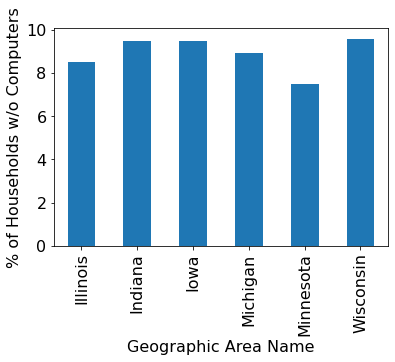

In [30]:
#Q22: same question, but answer with a bar plot.

def plot_dict(d, label_x = "Please Label Me!!!", label_y = "Please Label Me!!!"):
    ax = pd.Series(d).sort_index().plot.bar(fontsize = 16)
    ax.set_xlabel(label_x, fontsize=16)
    ax.set_ylabel(label_y, fontsize=16)
    
plot_dict(answer_dict, "Geographic Area Name", "% of Households w/o Computers")

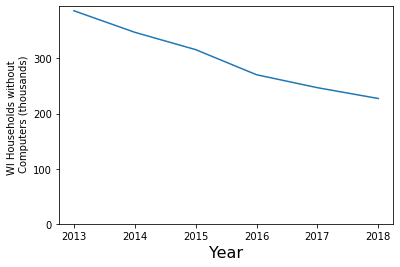

In [31]:
#Q23: how as the number of WI households without computers changed over recent years?

year_list2 = sorted(year_list)
year_dict = {}

for year in year_list2:
    year_dict[year] = years[year].loc[years[year]['Geographic Area Name'] == 'Wisconsin', "Estimate!!Total!!No Computer"].sum() / 1000 #divided by 1000 for the shape of the plot


s = pd.Series(year_dict)
s = s.plot()
s.set_xlabel("Year", fontsize = 16)
s.set_ylabel("WI Households without \n Computers (thousands)")
s.set_yticks([0,100,200,300])

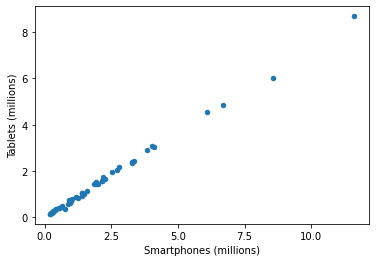

In [32]:
#Q24: what is the relationship between household with smartphones and those with tablets? (2018)


df = years[2018]

df = df.loc[:,["Estimate!!Total!!Has one or more types of computing devices!!Smartphone", "Estimate!!Total!!Has one or more types of computing devices!!Tablet or other portable wireless computer"]] / 1000000
sp = "Estimate!!Total!!Has one or more types of computing devices!!Smartphone"
tb = "Estimate!!Total!!Has one or more types of computing devices!!Tablet or other portable wireless computer"
plt = df.plot.scatter(sp,tb)
plt.set_xlabel("Smartphones (millions)")
plt.set_ylabel("Tablets (millions)")
plt.set_xticks([0.0, 2.5, 5.0, 7.5, 10.0])
plt.set_yticks([0, 2, 4, 6, 8])

In [33]:
#Q25: what is the first line of output from git log?

str(check_output(["git", "log"], cwd="cs320-p1"), "utf-8").split("\n")[0]

'commit 4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4'

In [34]:
#Q26: What are all the commit numbers?

commits = str(check_output(["git", "log"], cwd="cs320-p1"), "utf-8").split("\n")
commit_list = []

for line in commits:
    if line.startswith("commit"):
        commit = line.split(" ")
        commit_list.append(commit[1])
commit_list

['4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4',
 'f637df3f45bc389e1035cc3aadcf5d81a55f0dc4',
 'c10b5a6cb4f06c96f6f221df2d5ec33af767d5c5',
 'f37e610ce055a3d894baac2d9449e6eb77c72320',
 '6f5ca9327e986315ffcacddce5d9d6195c0913b7',
 '761627a3ad9ee681f27211326e9149f01764ceee',
 'b0df6dbe111f9e28fc3a9c9b841cde5c20c365f9',
 '6d7beafb8e79b7a92fed8e67673a33bb7f607dbe']

In [35]:
#Q27: how has the length of wc.py changed over time?



answer_dict = {}
for commit in commit_list:
    check_output(["git", "checkout", commit], cwd="cs320-p1")
    file_path = os.path.join("cs320-p1","wc.py")
    
    with open(file_path, "r") as f:
        data = f.read().strip().split("\n")
        
        
    answer_dict[commit] = len(data)
    
        


answer_dict

Note: switching to '4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at 4e41283 only make one pass over list to count all
Previous HEAD position was 4e41283 only make one pass over list to count all
HEAD is now at f637df3 only make one pass over list to count all
Previous HEAD position was f637df3 only make one pass over list to count all
HEAD is now at c10b5a6 optimize: only compute count once per unique word
Previous HEAD position was c10b5a6 optimize: only compute count

{'4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4': 43,
 'f637df3f45bc389e1035cc3aadcf5d81a55f0dc4': 40,
 'c10b5a6cb4f06c96f6f221df2d5ec33af767d5c5': 40,
 'f37e610ce055a3d894baac2d9449e6eb77c72320': 40,
 '6f5ca9327e986315ffcacddce5d9d6195c0913b7': 39,
 '761627a3ad9ee681f27211326e9149f01764ceee': 35,
 'b0df6dbe111f9e28fc3a9c9b841cde5c20c365f9': 35,
 '6d7beafb8e79b7a92fed8e67673a33bb7f607dbe': 21}

In [36]:
check_output(["git", "checkout", "main"], cwd="cs320-p1")

Previous HEAD position was 6d7beaf count a specific word
Switched to branch 'main'


b"Your branch is up to date with 'origin/main'.\n"

In [37]:
#Q28: what does python3 cs320-p1/wc.py input.txt ALL return when input.txt contains "A B C C"?
text = "A B C C"


with open("input.txt", 'w', encoding = 'utf-8') as f:
    f.write(text)


string = str(check_output("python3 cs320-p1/wc.py input.txt ALL", shell = True), "utf-8")
file = json.loads(string)
file

{'A': 1, 'B': 1, 'C': 2}

In [38]:
#Q29: for which versions (commits) of the program does the previous command fail?

fail_list = []

for commit in commit_list:
    check_output(["git", "checkout", commit], cwd="cs320-p1")
    try:
        str(check_output("python3 cs320-p1/wc.py input.txt ALL", shell = True), "utf-8")       
    except:
        fail_list.append(commit)
    


fail_list


Note: switching to '4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at 4e41283 only make one pass over list to count all
Previous HEAD position was 4e41283 only make one pass over list to count all
HEAD is now at f637df3 only make one pass over list to count all
Traceback (most recent call last):
  File "cs320-p1/wc.py", line 40, in <module>
    main()
  File "cs320-p1/wc.py", line 33, in main
    counts[word] += 1
KeyError: 'A'
Previous HEAD position was f637df3 only mak

['f637df3f45bc389e1035cc3aadcf5d81a55f0dc4']

In [39]:
check_output(["git", "checkout", "main"], cwd="cs320-p1")

Previous HEAD position was 6d7beaf count a specific word
Switched to branch 'main'


b"Your branch is up to date with 'origin/main'.\n"

In [40]:
def run_wc(word, commit):
    with open("input.txt", "w", encoding = "utf-8") as f:
        f.write(word)
        
    check_output(["git", "checkout", commit], cwd="cs320-p1")
    result = str(check_output("python3 cs320-p1/wc.py input.txt ALL", 
                                shell = True), encoding = "utf-8")
    file = json.loads(result)
    return file



Note: switching to '4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at 4e41283 only make one pass over list to count all
HEAD is now at 4e41283 only make one pass over list to count all
HEAD is now at 4e41283 only make one pass over list to count all
HEAD is now at 4e41283 only make one pass over list to count all
HEAD is now at 4e41283 only make one pass over list to count all
HEAD is now at 4e41283 only make one pass over list to count all


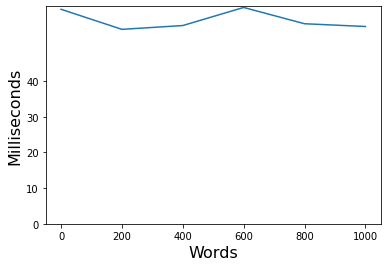

In [41]:
#Q30: for commit 4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4, what is the relationship between input size and time to run wc.py?

plot_dict = {}
for i in range(0,1200,200):
    t0 = time.time()
    run_wc("word\n" * i, "4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4")
    t1 = time.time()
    running_time = (t1-t0) * 1000
    plot_dict[i] = running_time

series = pd.Series(plot_dict)
series = series.plot()
series.set_xlabel("Words", fontsize = 16)
series.set_ylabel("Milliseconds", fontsize = 16)
series.set_yticks([0,10,20,30,40])



Previous HEAD position was 4e41283 only make one pass over list to count all
HEAD is now at f37e610 do not repeatedly re-read file, use with to automatically close
HEAD is now at f37e610 do not repeatedly re-read file, use with to automatically close
HEAD is now at f37e610 do not repeatedly re-read file, use with to automatically close
HEAD is now at f37e610 do not repeatedly re-read file, use with to automatically close
HEAD is now at f37e610 do not repeatedly re-read file, use with to automatically close
HEAD is now at f37e610 do not repeatedly re-read file, use with to automatically close


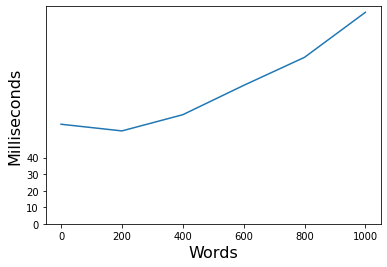

In [42]:
#Q31: for commit f37e610ce055a3d894baac2d9449e6eb77c72320, what is the relationship between input size and time to run wc.py?

plot_dict = {}
for i in range(0,1200,200):
    t0 = time.time()
    run_wc("word\n" * i, "f37e610ce055a3d894baac2d9449e6eb77c72320")
    t1 = time.time()
    running_time = (t1-t0)
    plot_dict[i] = running_time * 1000
    
series = pd.Series(plot_dict)
series = series.plot()
series.set_xlabel("Words", fontsize = 16)
series.set_ylabel("Milliseconds", fontsize = 16)
series.set_yticks([0,10,20,30,40])



Previous HEAD position was f37e610 do not repeatedly re-read file, use with to automatically close
HEAD is now at 6f5ca93 ignore case, usage line
HEAD is now at 6f5ca93 ignore case, usage line
HEAD is now at 6f5ca93 ignore case, usage line
HEAD is now at 6f5ca93 ignore case, usage line
HEAD is now at 6f5ca93 ignore case, usage line
HEAD is now at 6f5ca93 ignore case, usage line


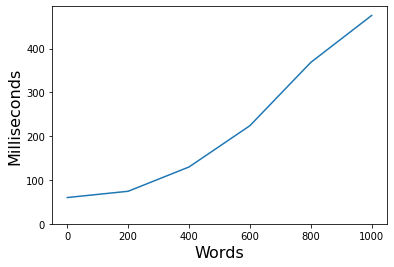

In [43]:
#Q32: for commit 6f5ca9327e986315ffcacddce5d9d6195c0913b7, what is the relationship between input size and time to run wc.py?

plot_dict = {}
for i in range(0,1200,200):
    t0 = time.time()
    run_wc("word\n" * i, "6f5ca9327e986315ffcacddce5d9d6195c0913b7")
    t1 = time.time()
    running_time = (t1-t0) * 1000
    plot_dict[i] = running_time
    
series = pd.Series(plot_dict)
series = series.plot()
series.set_xlabel("Words", fontsize = 16)
series.set_ylabel("Milliseconds", fontsize = 16)
series.set_yticks([0,100,200,300,400])



In [44]:
check_output(["git", "checkout", "main"], cwd="cs320-p1")

Previous HEAD position was 6f5ca93 ignore case, usage line
Switched to branch 'main'


b"Your branch is up to date with 'origin/main'.\n"